# Resizing an Image by Blocks

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Image shape: (965, 1158)


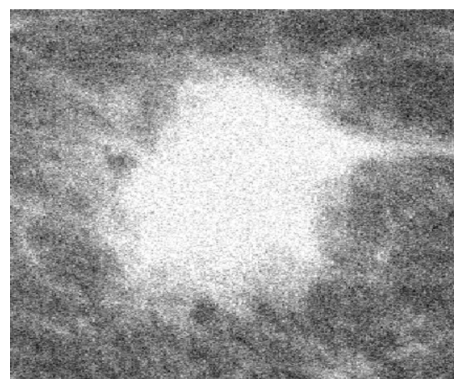

In [2]:
tumor = cv2.imread("./images/tumorLargeFile.jpg", cv2.IMREAD_GRAYSCALE)
tumor = tumor / tumor.max()
print(f"Image shape: {tumor.shape}")
plt.imshow(tumor, cmap="gray")
plt.axis("off")
plt.show()

Shrinking the image of a tumor by replacing a block by its median value.

In [3]:
# Distinct block processing for image
def blockproc(image, block_size, function):
    h, w = image.shape
    m, n = block_size
    image_resized = np.zeros((int(np.ceil(h/m)), int(np.ceil(w/n).astype(int))))
    for x in range(0, h, m):
        for y in range(0, w, n):
            block = image[x:x+m, y:y+n]
            image_resized[int(x/m), int(y/n)] = function(block)

    return image_resized

Image shape: (65, 78)


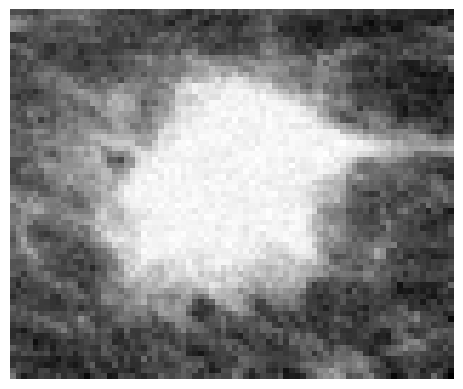

In [4]:
tumor_resized = blockproc(tumor.copy(), (15, 15), np.median)
print(f"Image shape: {tumor_resized.shape}")
plt.imshow(tumor_resized, cmap='gray')
plt.axis("off")
plt.show()